# 16 Oct 2018 - Initial exploration of range sensor data

In [1]:
import numpy as np
import pandas as pd
#import pylab as plt
import matplotlib.pyplot as plt

%matplotlib qt

## Oct 15

In [2]:
fn1 = "rng10152018_pi71.001"
fn2 = "rng10152018_pi72.001"
fn3 = "rng10152018_pi73.001"
fn4 = "rng10152018_pi74.001"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\15_10_2018\\PM\\"

data1 = np.genfromtxt(dn+fn1,delimiter='R',usecols=(1,))
data2 = np.genfromtxt(dn+fn2,delimiter='R',usecols=(1,))
data3 = np.genfromtxt(dn+fn3,delimiter='R',usecols=(1,))
data4 = np.genfromtxt(dn+fn4,delimiter='R',usecols=(1,))

(500, 1500)

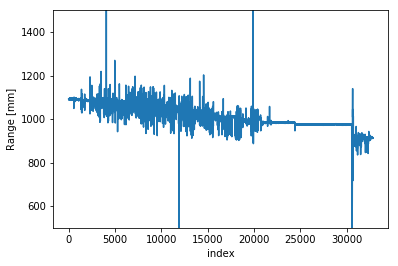

In [3]:
plt.figure
plt.plot(data1)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
# plt.show()

Note the delayed returns (e.g. bed farther away than sould be) -- apparently following or preceding runup events. Air bubbles in swash?

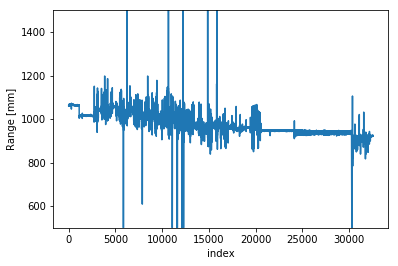

In [4]:
plt.figure
plt.plot(data2)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
plt.show()

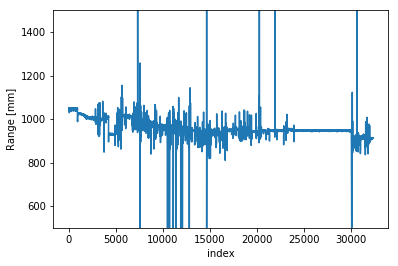

In [5]:
plt.figure
plt.plot(data3)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
plt.show()

NB: change in bed elevation at ~5000 is a clump of seaweed. 

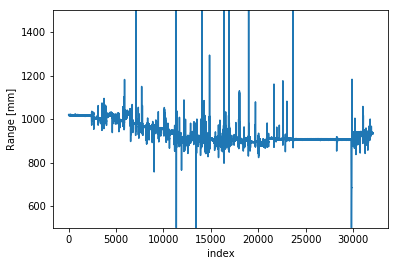

In [6]:
plt.figure
plt.plot(data4)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
plt.show()

Try a moving average filter (should really clean erroneous values first):

In [7]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

In [8]:
N = 10
data1_rm = running_mean(data1, N) 

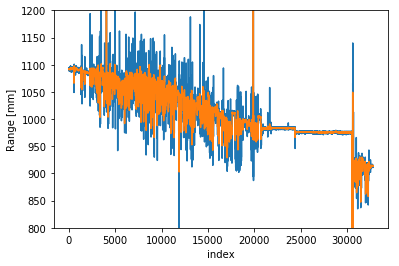

In [9]:
plt.figure
plt.plot(data1)
plt.plot(data1_rm)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([800, 1200])
plt.show()

In [10]:
import numpy 

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y



In [11]:
data_sm = smooth(data4,window_len=17,window='hanning') #x,window_len=11,window='hanning'

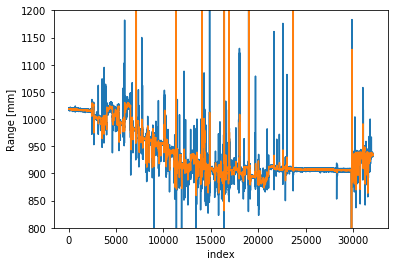

In [12]:
plt.figure
plt.plot(data4)
plt.plot(data_sm)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([800, 1200])
plt.show()

# Oct 20

In [13]:
# Oct 20 - energetic morning
fn1 = "sonar71_2018-10-20-13_08.dat"
fn2 = "sonar72_2018-10-20-13_08.dat"
fn3 = "sonar73_2018-10-20-13_08.dat"
fn4 = "sonar74_2018-10-20-13_08.dat"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\20_10_2018\\AM\\"

with open(dn+fn1, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'Oct',b'10').replace(b':',b' ') for line in f )
    range1 = np.genfromtxt(clean_lines,usecols=(5,),delimiter=' ')
    
with open(dn+fn2, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'Oct',b'10').replace(b':',b' ') for line in f )
    range2 = np.genfromtxt(clean_lines,usecols=(5,),delimiter=' ')
    
with open(dn+fn3, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'Oct',b'10').replace(b':',b' ') for line in f )
    range3 = np.genfromtxt(clean_lines,usecols=(5,),delimiter=' ')
    
with open(dn+fn4, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'Oct',b'10').replace(b':',b' ') for line in f )
    range4 = np.genfromtxt(clean_lines,usecols=(5,),delimiter=' ') 

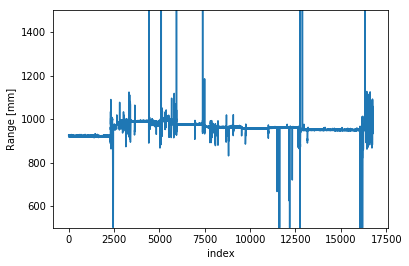

In [14]:
plt.figure
plt.plot(range1)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
# plt.xlim([9000, 10000])
plt.show()

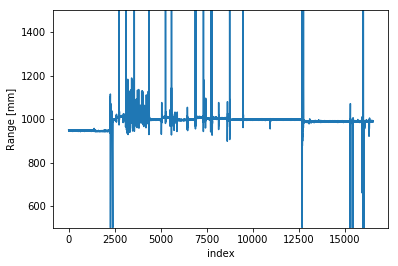

In [15]:
plt.figure
plt.plot(range2)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
plt.show()

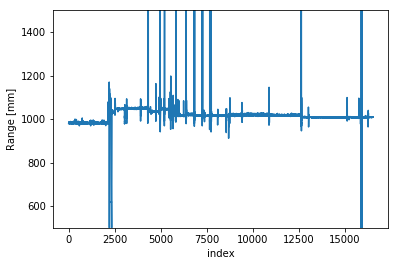

In [16]:
plt.figure
plt.plot(range3)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
plt.show()

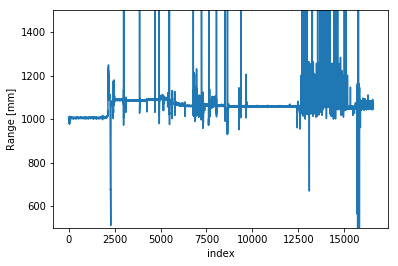

In [17]:
plt.figure
plt.plot(range4)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1500])
# plt.xlim([12500, 13000])
plt.show()

## Oct 21 - cusp day

In [18]:
## Oct 21 - cusp day
fn1 = "sonar71_2018-10-21-13_01.dat"
fn2 = "sonar72_2018-10-21-13_01.dat"
fn3 = "sonar73_2018-10-21-13_01.dat"
fn4 = "sonar74_2018-10-21-13_01.dat"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\21_10_2018\\AM\\"

# nb: I manually deleted the last line of each file which was incomplete
with open(dn+fn1, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range1 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn2, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range2 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn3, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range3 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn4, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range4 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')

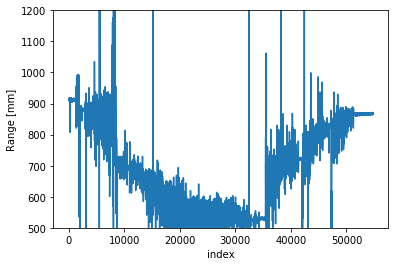

In [31]:
plt.figure
plt.plot(range1)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1200])
# plt.xlim([5000, 5500])
plt.show()

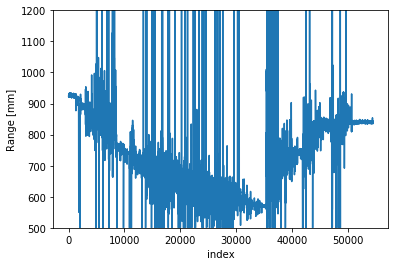

In [36]:
plt.figure
plt.plot(range2)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1200])
# plt.xlim([5000, 20000])
plt.show()

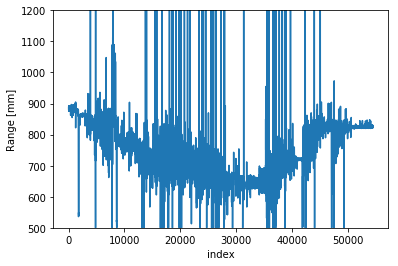

In [32]:
plt.figure
plt.plot(range3)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1200])
# plt.xlim([5000, 20000])
# plt.xlim([25000, 40000])
plt.show()

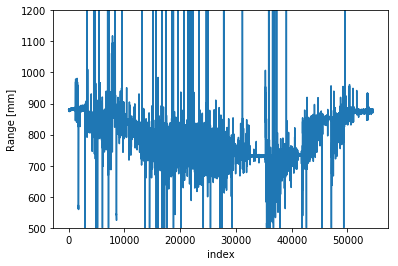

In [33]:
plt.figure
plt.plot(range4)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([500, 1200])
# plt.xlim([5000, 6000])
# plt.xlim([25000, 30000])
plt.show()

## Oct 23

In [23]:
 ## Oct 23 - cusp day
fn1 = "sonar71_2018-10-23-13_37.dat"
fn2 = "sonar72_2018-10-23-13_37.dat"
fn3 = "sonar73_2018-10-23-13_37.dat"
fn4 = "sonar74_2018-10-23-13_37.dat"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\23_10_2018\\AM\\"

# nb: I manually deleted the last line of each file which was incomplete
with open(dn+fn1, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range1 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn2, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range2 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn3, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range3 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')
    
with open(dn+fn4, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    range4 = np.genfromtxt(clean_lines,usecols=(6,),delimiter=' ')

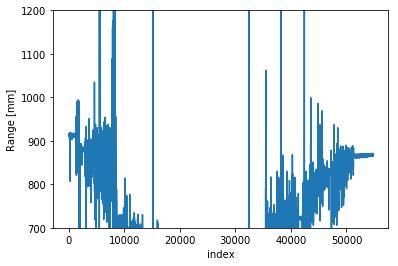

In [38]:
plt.figure
plt.plot(range1)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([700, 1200])
# plt.xlim([5000, 5500])
plt.show()

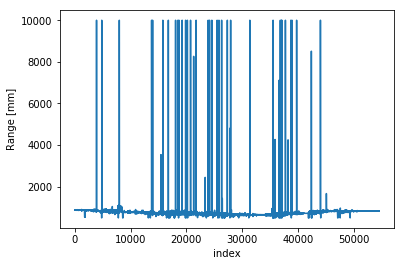

In [25]:
plt.figure
plt.plot(range3)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([700, 1200])
# plt.xlim([5000, 5500])
plt.show()

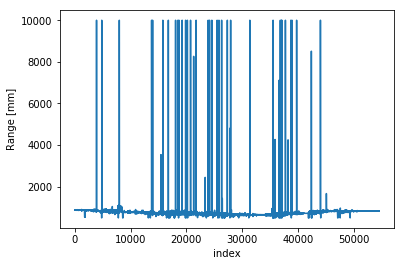

In [26]:
plt.figure
plt.plot(range3)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([700, 1200])
# plt.xlim([5000, 5500])
plt.show()

Text(0,0.5,'Range [mm]')

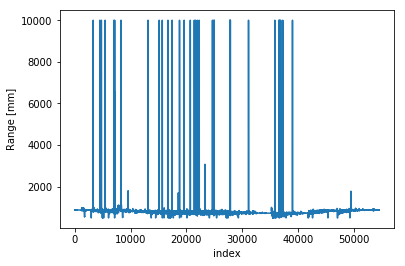

In [27]:
plt.figure
plt.plot(range4)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([700, 1200])
# plt.xlim([5000, 5500])
# plt.show()